In [ ]:
---
title: 'DSAN-5100: Lab-3'
author: "Dr. Purna Gamage"
format: 
  html: 
    embed-resources: true
---

# Discrete Distributions

# 1. Binomial Distribution

### Make random samples

$X \sim Binomial(20,0.4)$

In [1]:
n = 20
p = 0.4
(x<- rbinom(1,n,p)) #one binomial distributed random variate with (n,p)
(y<- rbinom(5,n,p)) #five binomial distributed random variate with (n,p)

[1] 15

[1]  6 11  6  6  6

### Compute and plot probability mass function(pmf)

$P(X=3) ?$

In [2]:
dbinom(3,n,p)
dbinom(3.3,n,p) #Why wrong?

[1] 0.01234969

Warning message in dbinom(3.3, n, p):
"non-integer x = 3.300000"


[1] 0

Plot pmf 

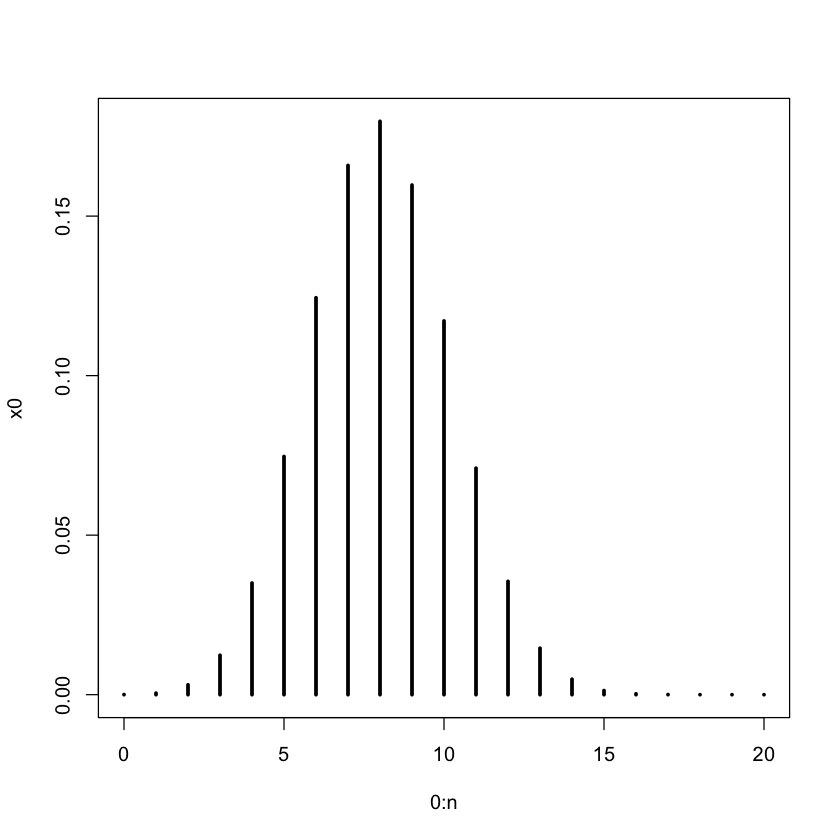

In [3]:
dbinom(0:n,n,p) -> x0
plot(0:n,x0,type = 'h', lwd = 3)

_The sum of the pmf equals 1._

In [4]:
sum(dbinom(0:20,20,.4))

[1] 1

### Compute pbinom() in terms of dbinom()

$P(X<5)?$

In [5]:
pbinom(4,n,p)

#or
pbinom(4.5,n,p)

#or
sum(dbinom(0:4,n,p))


[1] 0.05095195

[1] 0.05095195

[1] 0.05095195

### Estimate dbinom() using rbinom()

$P(X=4)$

In [6]:
dbinom(4,n,p)
mean(rbinom(100000,n,p) == 4)

[1] 0.03499079

[1] 0.03487

### Make a large random sample and plot a histogram.

_The histogram of the sample looks similar to, but is not identical to the histogram plot of the pmf in the previous picture._

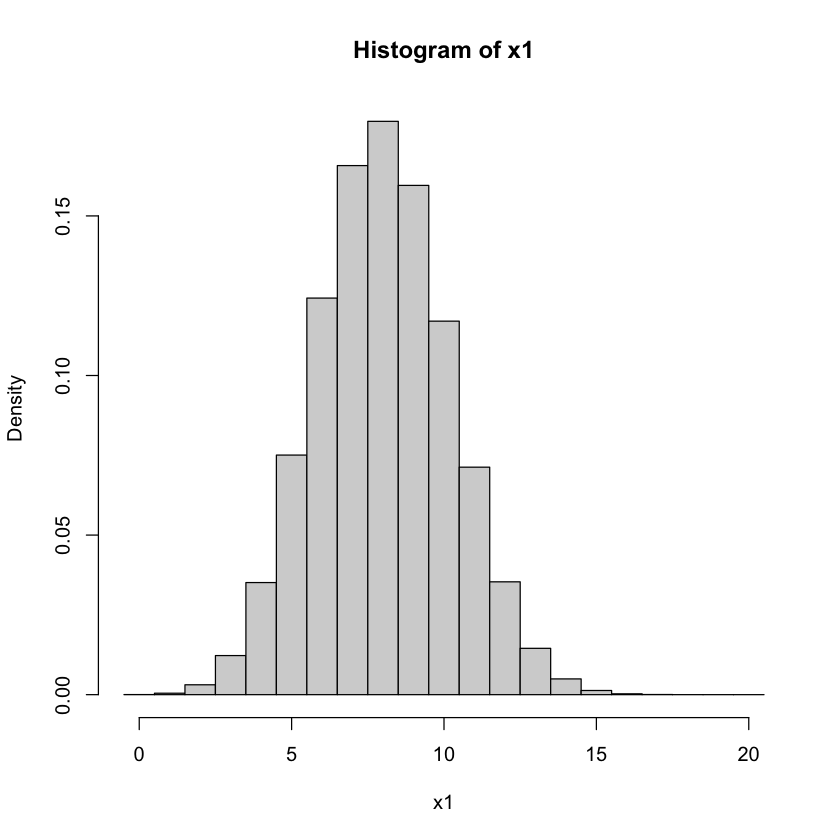

In [7]:
x1 <- rbinom(1000000,n,p)
hist(x1, prob = T, breaks = seq(-.5,20.5,by = 1))

## Cumulative distribution function.

$P(X\le5)$

In [8]:
pbinom(5,n,p)
pbinom(5.5,n,p) #same

pbinom(4.5,n,p) #not same

[1] 0.125599

[1] 0.125599

[1] 0.05095195

Plot the CDF.

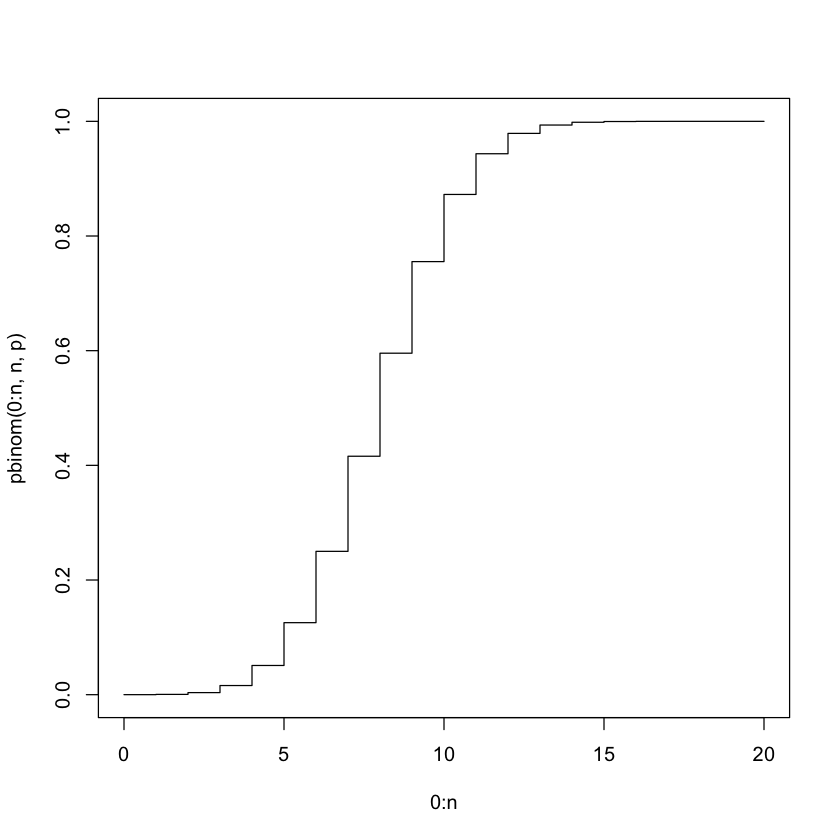

In [9]:
plot(0:n,pbinom(0:n,n,p), type = 's')

### Guess the relation between the three values before computing them.

In [10]:
pbinom(5,n,p)
pbinom(5.1,n,p)
pbinom(4.99,n,p)

[1] 0.125599

[1] 0.125599

[1] 0.05095195

_Why?_

## CDF

### Plot the cdf as a step function

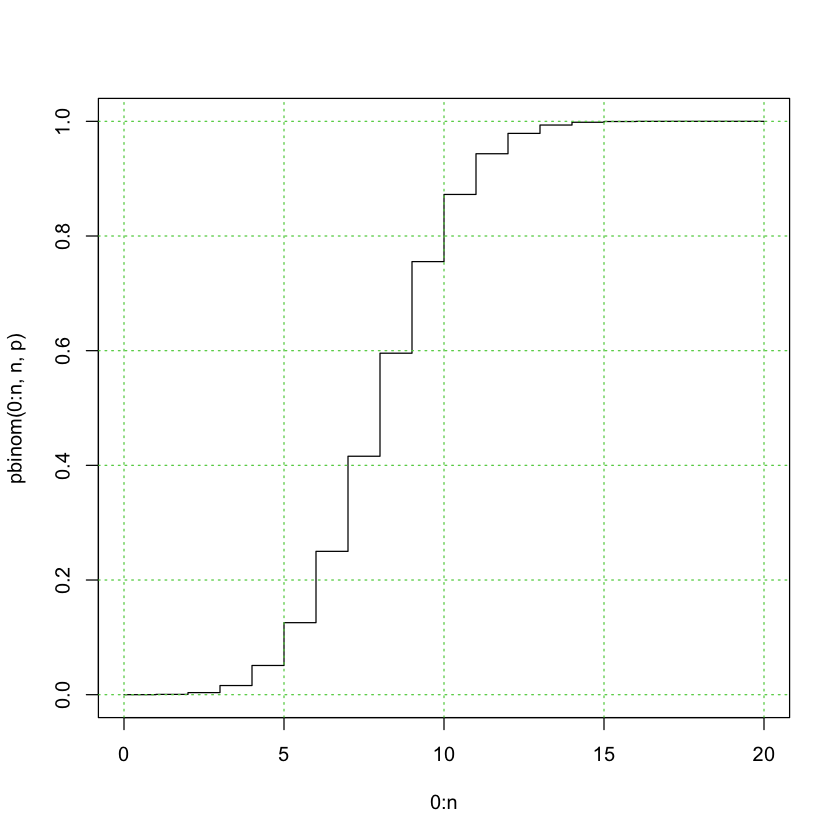

In [11]:
plot(0:n,pbinom(0:n,n,p), type = 's')
grid(col = 3)

## Quantiles 

### Explain the behavior.

In [12]:
qbinom(.3,n,p)
qbinom(.35,n,p)
qbinom(.4722,n,p)
qbinom(.2799,n,p)

[1] 7

[1] 7

[1] 8

[1] 7

In [13]:
pbinom(qbinom(.333,n,p),n,p)
pbinom(7,n,p)

[1] 0.4158929

[1] 0.4158929

( _Explain in the Lab_ )

_*Explain this! Why is this not 0.333?*_

In [14]:
qbinom(pbinom(6,n,p),n,p)
pbinom(6,n,p)
qbinom(0.25,n,p)

[1] 6

[1] 0.2500107

[1] 6

_*Explain this! Why is this equal to 6 again?*_


### Plot cdf and quantile function in the same plot.

_This shows that the cdf and the quantile function are inverses of each other (in a certain sense). _

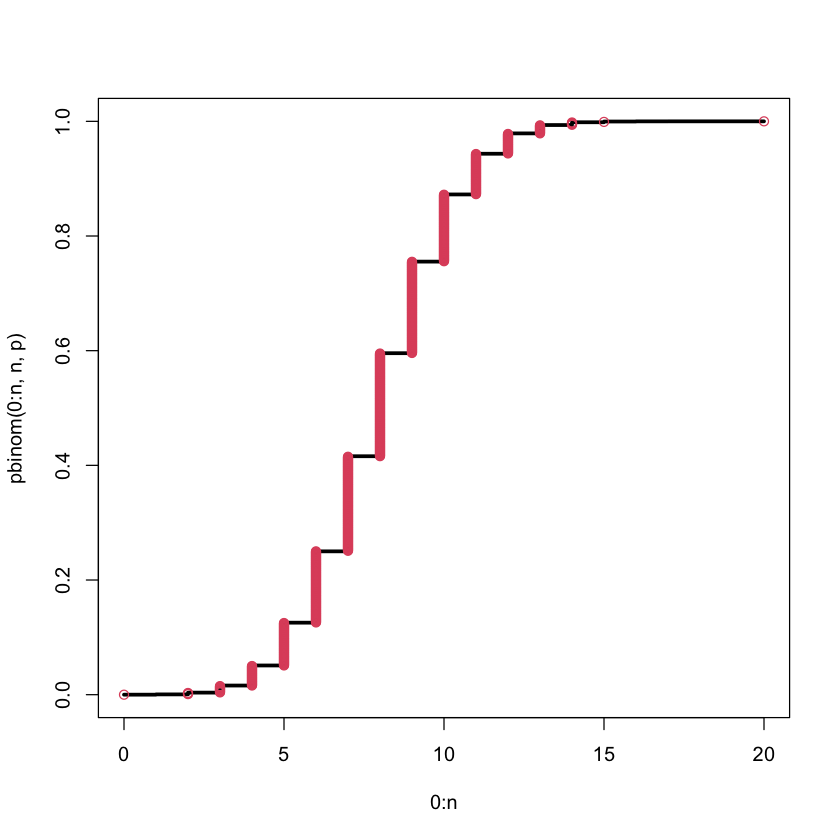

In [15]:
plot(0:n,pbinom(0:n,n,p), type = 's', lwd = 3)
p0 = seq(0,1,by = .001)
points(qbinom(p0,n,p),p0,col = 2)

## Empirical cdf ( _Explain in the Lab_ )

<https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480>

An empirical cumulative distribution function (CDF) is a non-parametric estimator of the underlying CDF of a random variable.

while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data. To put this another way, the ECDF is the probability distribution you would get if you sampled from your sample, instead of the population. 

We used the binomial and normal cumulative distributions, respectively, to calculate probabilities and visualize the distribution. In real life, however, the data we collect or observe does not come from a theoretical distribution. We have to use the data itself to create a cumulative distribution.



Refer:
<https://www.statisticshowto.com/empirical-distribution-function/>

<https://data.library.virginia.edu/understanding-empirical-cumulative-distribution-functions/>


### Plot both ecdf and cdf in the same coordinate system. ( _Explain in the Lab_ )


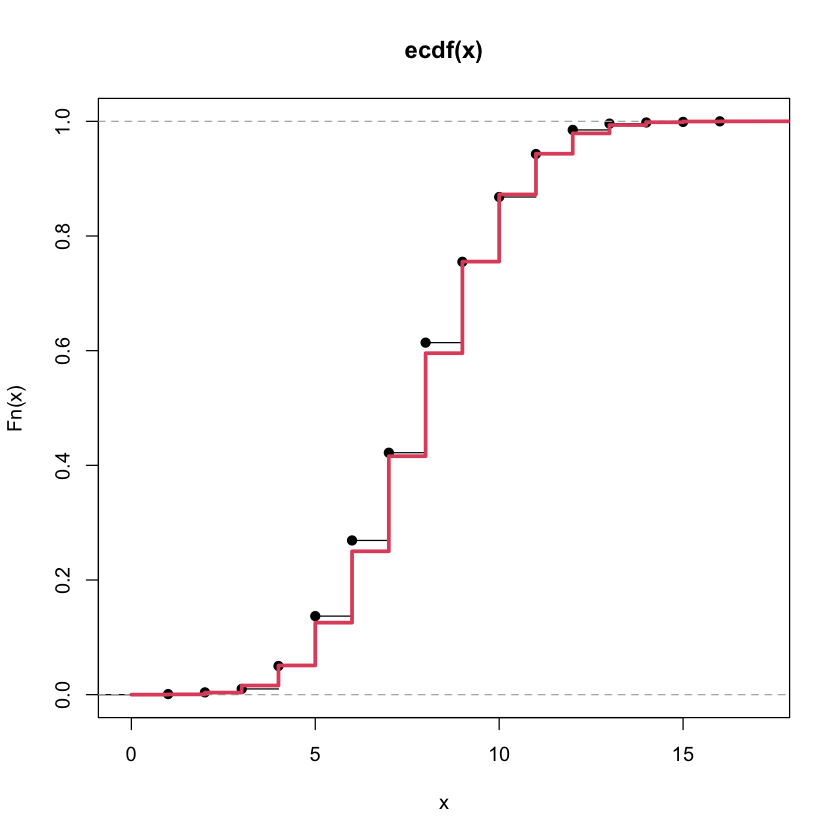

In [16]:
m = 1000
x2 <- rbinom(m,n,p)

plot.ecdf(x2) #we can directly plot using plot.ecdf

lines(0:n,pbinom(0:n,n,p), col = 2, lwd = 3, type = 's')

## Example 1: ( _Explain in the Lab_ )

a. Define the empirical cdf. (instead of plot.ecdf).

b. Then plot the difference between true cdf and empirical cdf.


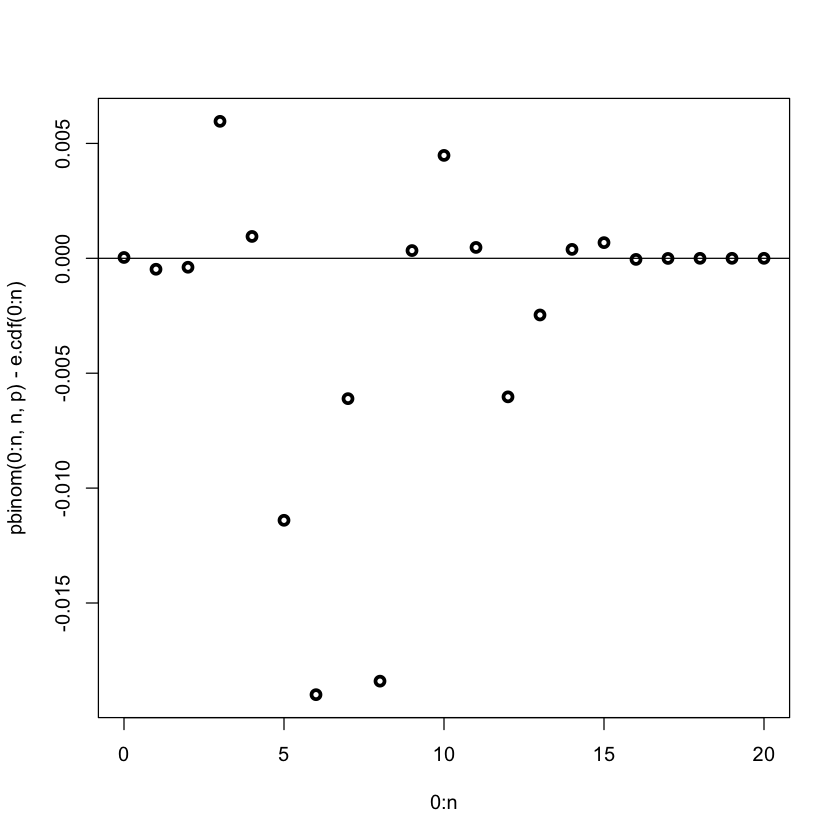

In [17]:
#a.
e.cdf <- ecdf(x2) # empirical cdf

#b. Difference
plot(0:n,pbinom(0:n,n,p) - e.cdf(0:n), lwd = 3)
abline(h = 0)

_The difference is very small. This means the estimated values are closer to the theoretical values._

## Example 2: ( _Explain in the Lab_ )

Plot the empirical CDF and theoretical CDF against each other.

_Why do we check this?_

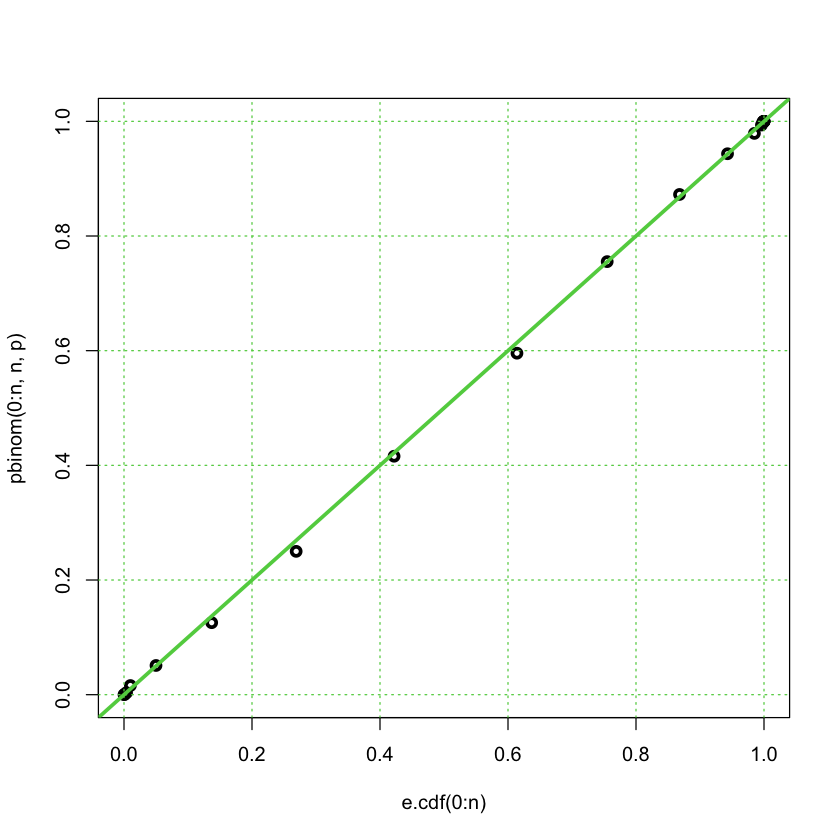

In [18]:
plot(e.cdf(0:n), pbinom(0:n,n,p), lwd = 3)
grid(col = 3)
abline(a=0, b = 1, col = 3, lwd = 3)

_The points should lie on a straight line._  

_This is a way of checking whether a given sample has a hypothetical distribution._

In most of the reasearch we do, we may not know the exact probability distribution. In such case, we can compare the ecdf with the cdf's of known distributions to see if our data follows a known distribution (Which makes our lives easier :))



# 2. Geometric and Negative Binomial Distributions 

### Plot the probability mass functions for a few cases 

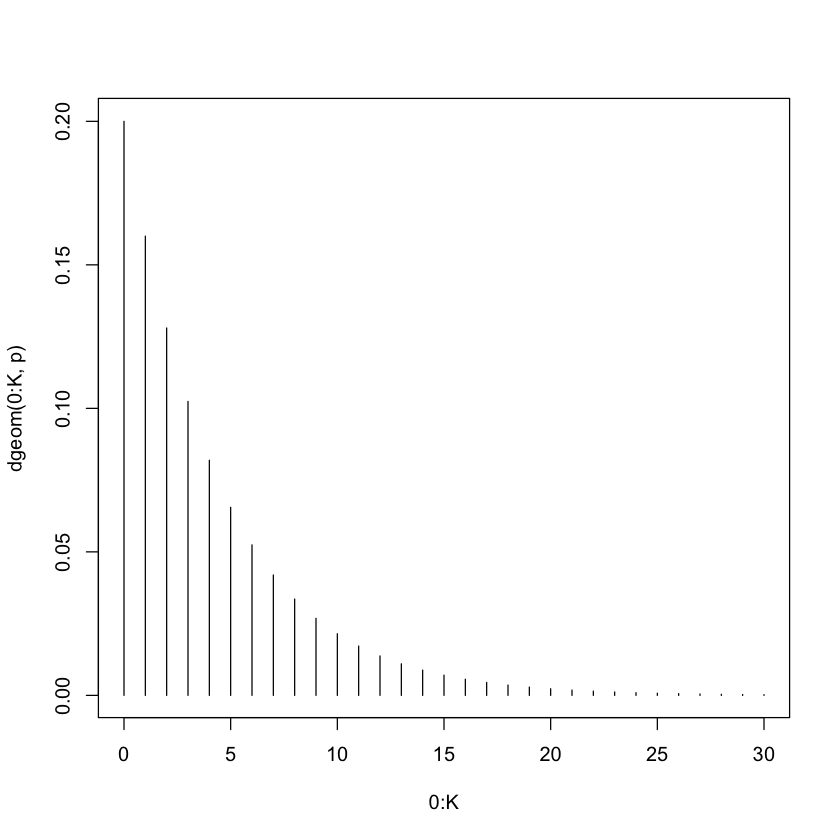

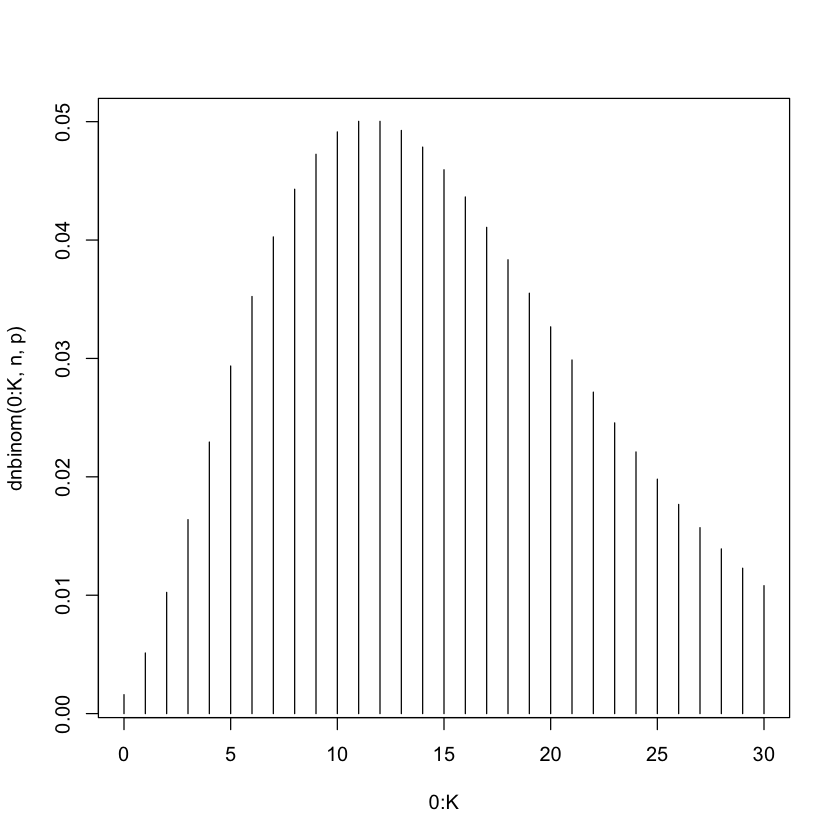

In [19]:
n = 4
p = .2
K = 30
plot(0:K, dgeom(0:K,p), type = 'h')
plot(0:K, dnbinom(0:K,n,p), type = 'h')

# 3. Negative Binomial Distribution 

## Example 3a: ( _done in class_ )

An oil company has a p = 0.20 chance of striking oil when drilling a well. What is the probability the company drills 7 wells to strike oil r = 3 times?

_If we are drillling 7 wells but strike oil only 3 times , that means our number of failures is 4 until 3 successes. Therefore, we need to find the probability _

$$P(X=4)$$
x	= number of failures. 
size	= target for number of successful trials, Must be strictly positive, need not be integer.

prob	= probability of success in each trial. $0 < prob \le  1$.

In [20]:
r = 3
p = 0.20
n = 7 - r
# exact
#dnbinom(x, size, prob)
dnbinom(x = n, size = r, prob = p)

[1] 0.049152

[1] 0.0272000 0.0579200 0.0988800 0.1480320 0.2030822 0.2618025 0.3222005
 [8] 0.3825985 0.4416543 0.4983478

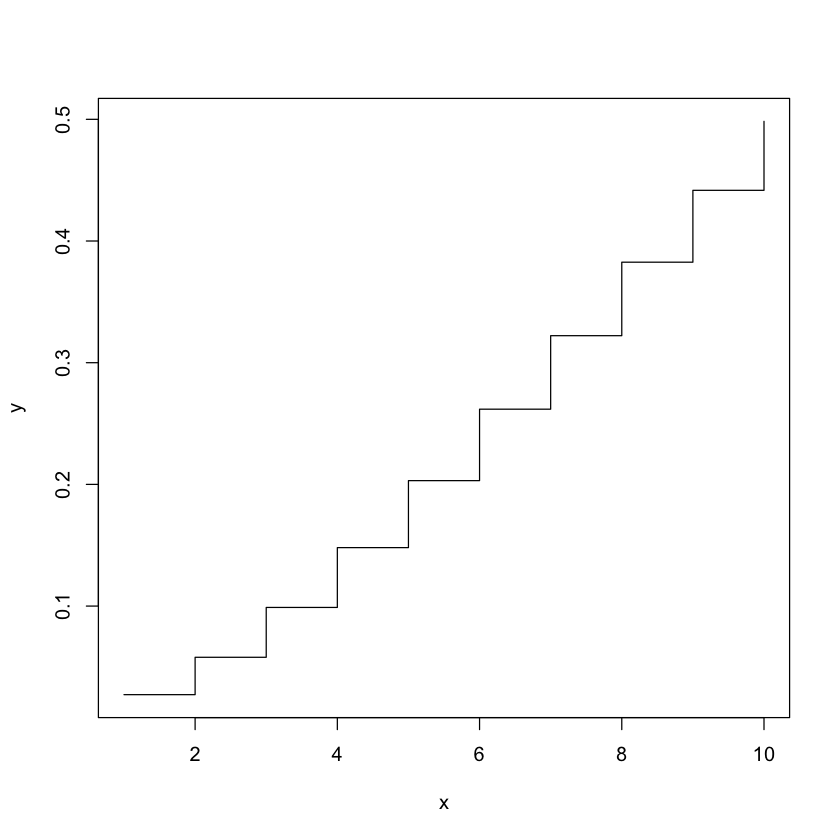

In [21]:
# Negative Binomial Cumulative Density

# Vector of x-values
x <- 1:10

y <- pnbinom(x, size = r, prob = p)
y

# Plot a graph
plot(x, y, type = 's')

Let's try a simulation;

In [22]:
# simulated
mean(rnbinom(n = 10000, size = r, prob = p) == n)

[1] 0.0452

## Example 3b: 

`_done in class_`

Cumulative Probability of X failed trials(1-20) to achieve 3rd success. (Assuming more than 20 trials in the experiment - at least 23 or more trials)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




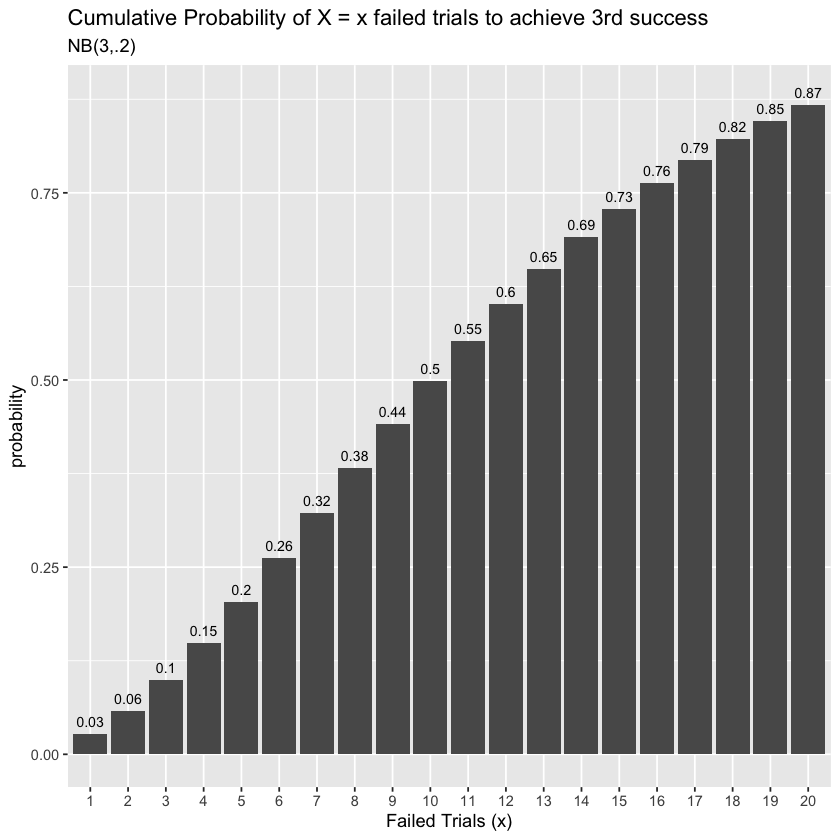

In [23]:
library(dplyr)
library(ggplot2)

data.frame(x = 1:20, 
           pmf = dnbinom(x = 1:20, size = r, prob = p),
           cdf = pnbinom(q = 1:20, size = r, prob = p, lower.tail = TRUE)) %>%
ggplot(aes(x = factor(x), y = cdf)) +
  geom_col() +
  geom_text(
    aes(label = round(cdf,2), y = cdf + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  ) +
  labs(title = "Cumulative Probability of X = x failed trials to achieve 3rd success",
       subtitle = "NB(3,.2)",
       x = "Failed Trials (x)",
       y = "probability") 

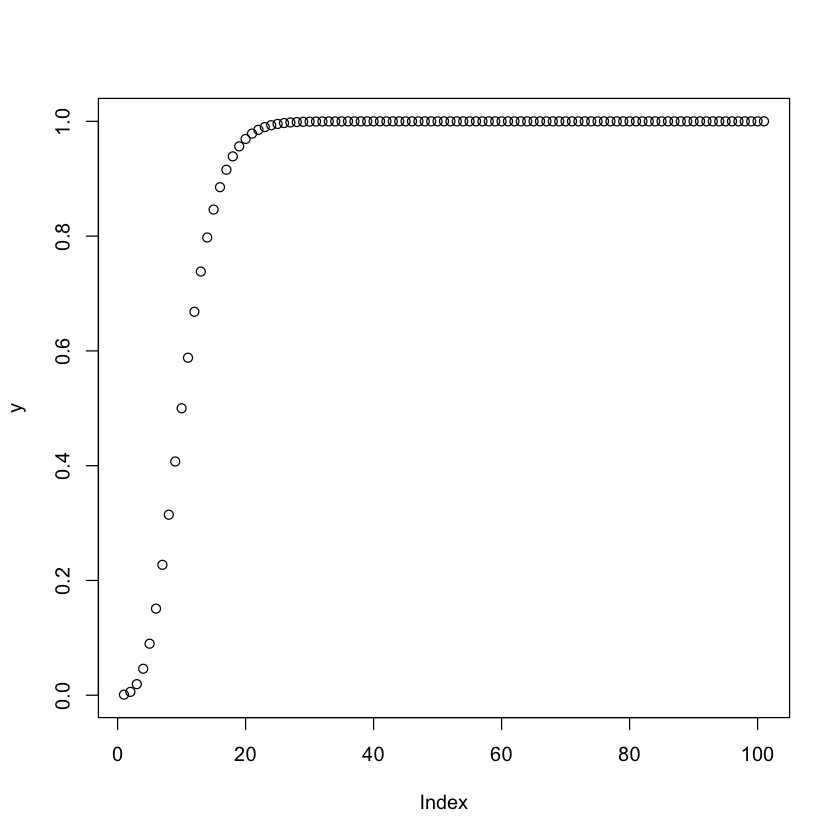

In [24]:
# Negative Binomial Cumulative Density

# Vector of x-values
x <- seq(0, 100, by = 1)

# Calling pnbinom() Function
y <- pnbinom(x, size = 10, prob = 0.5)


# Plot a graph
plot(y)

# 4. Poisson Distribution

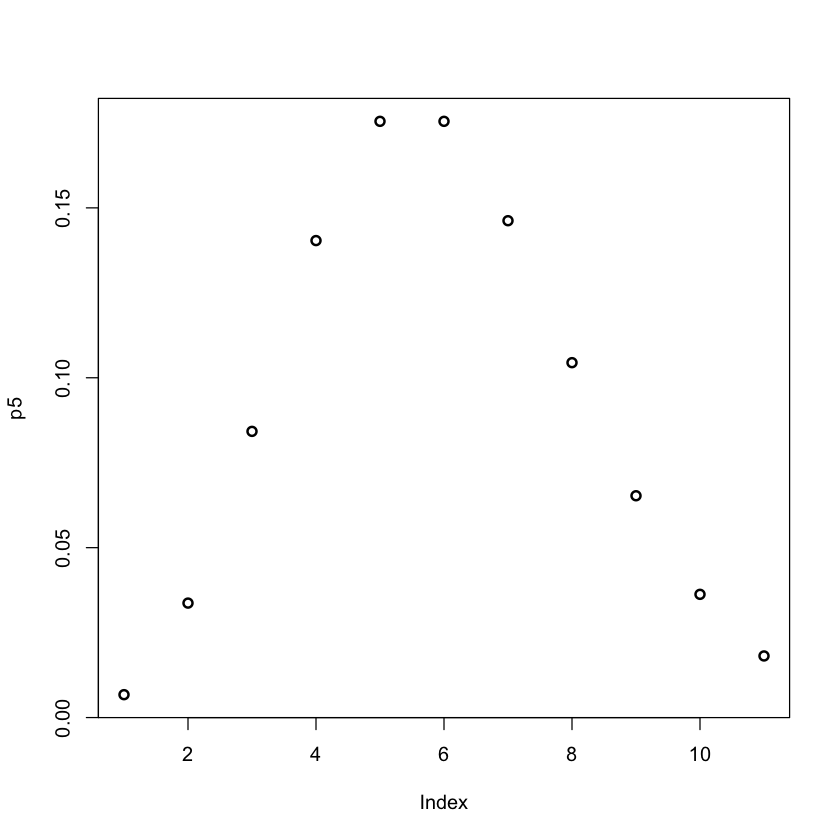

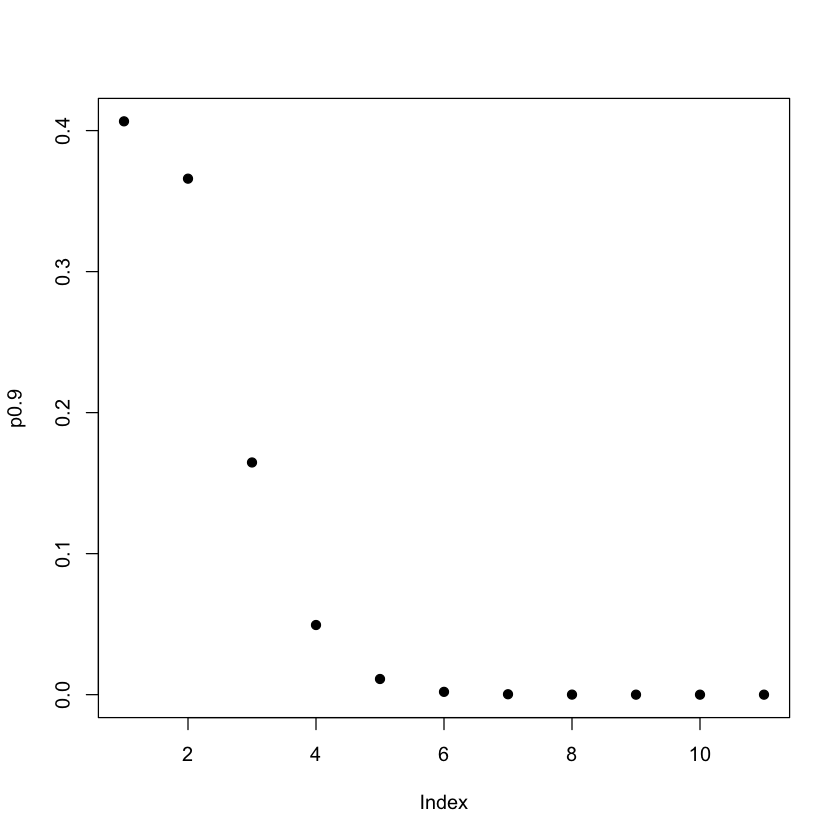

In [25]:
p5=dpois(0:10,5)
p0.9=dpois(0:10,0.9)
plot(p5,lwd=2)
plot(p0.9, pch=19)

## Pmf and CDF of Poisson Distribution 

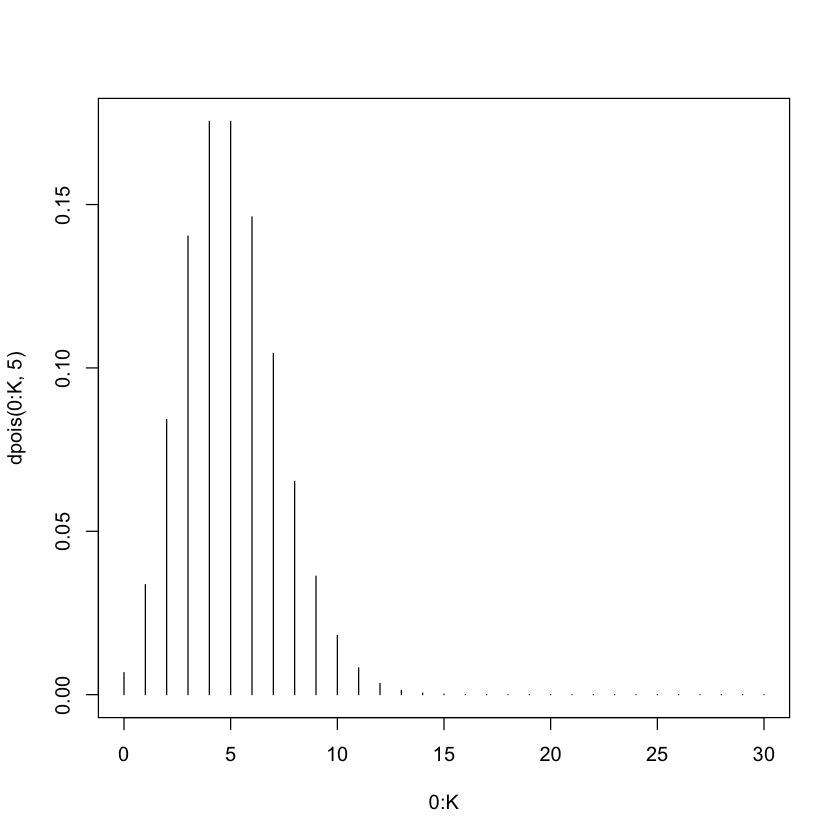

In [26]:
plot(0:K, dpois(0:K, 5), type = 'h') #pmf

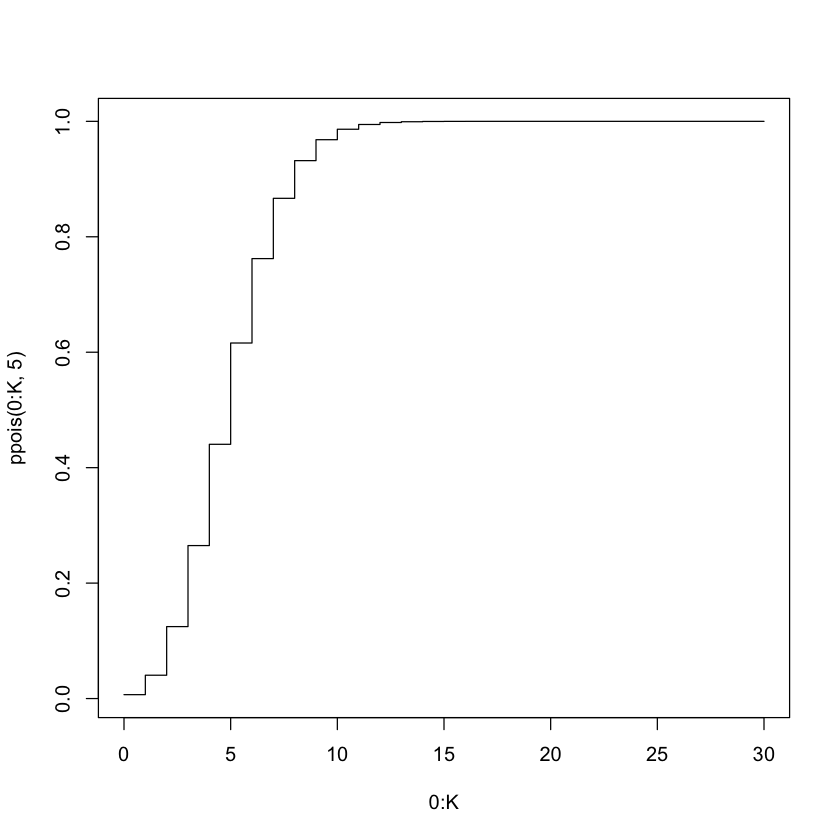

In [27]:
plot(0:K, ppois(0:K, 5), type = 's') #cdf

## Example 4: Show that Poisson distribution is a limit of binomial distributions 

In [28]:
n = 100
p0 = .05
lambda = n*p0

Make a large binomial sample with these parameters; 


In [29]:
x3 <- rbinom(1000,n,p0) #binomial
x4 <- rpois(2000,lambda) #poisson

Plot the ecdf of one on top of the cdf of the other. 

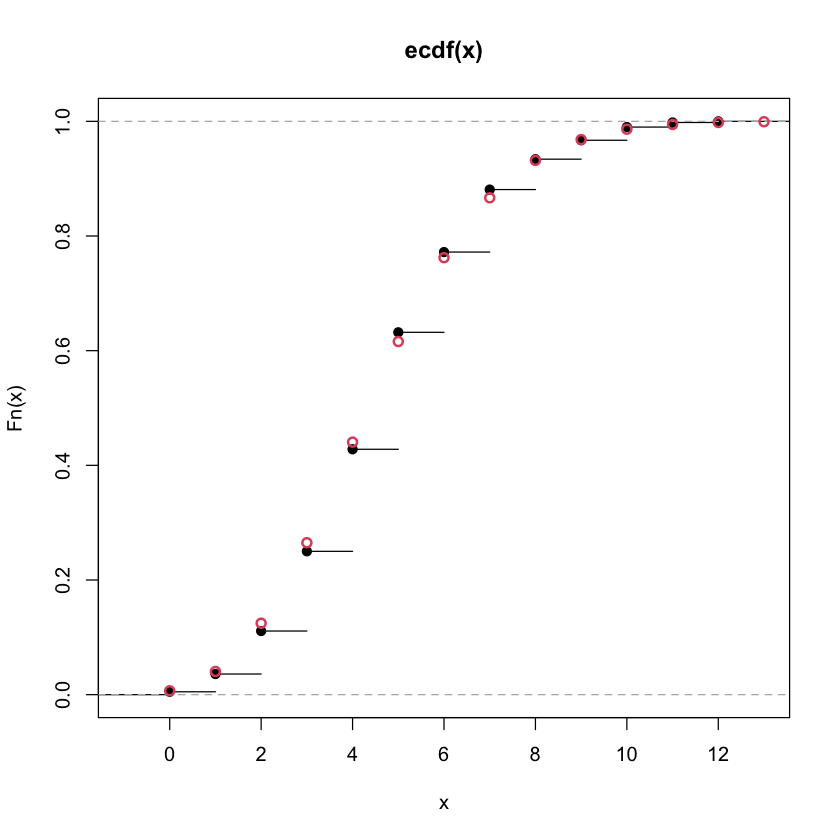

In [30]:
plot.ecdf(x3) #binomial
points(0:15, ppois(0:15,lambda), col = 2, lwd = 2)

I can compare the ecdf of x3 with a cdf of a poison(lamda) distribution.
The result should be a straight line.

_Why?_

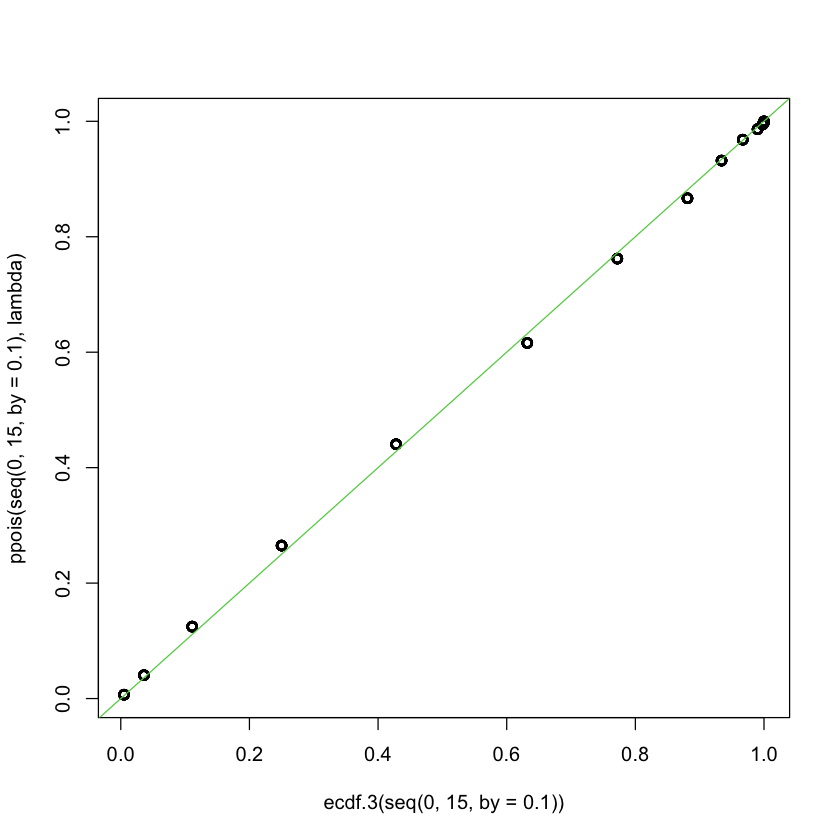

In [31]:
ecdf.3 <- ecdf(x3) #binomial
plot(ecdf.3(seq(0,15,by = .1)),ppois(seq(0,15,by = .1),lambda), lwd = 2)
abline(a = 0, b = 1, col = 3)

# 5.  Hypergeometric Distribution


The phyper() function allows us to calculate hypergeometric probabilities. The first argument is the set of possible values for which we want the probabilities. Then come the parameters, in the order population size, number of good elements, sample size.

## Example 5: 

What is the probability of selecting x = 14 red marbles from a sample of k = 20 taken from an urn containing m = 70 red marbles and n = 30 green marbles?

$dhyper(x = x, m = m, n = n, k = k)$

m = number of successes in the population
n = number of failures in the population
x = number of successes in the sample
k = the sample size

In [32]:
x = 14 #number of successive draws
m = 70 #total number of successes inside the urn
n = 30 #total number of failures inside the urn
k = 20 #number of draws(trails)

dhyper(x = x, m = m, n = n, k = k)

[1] 0.2140911

Plotting for different number of success draws

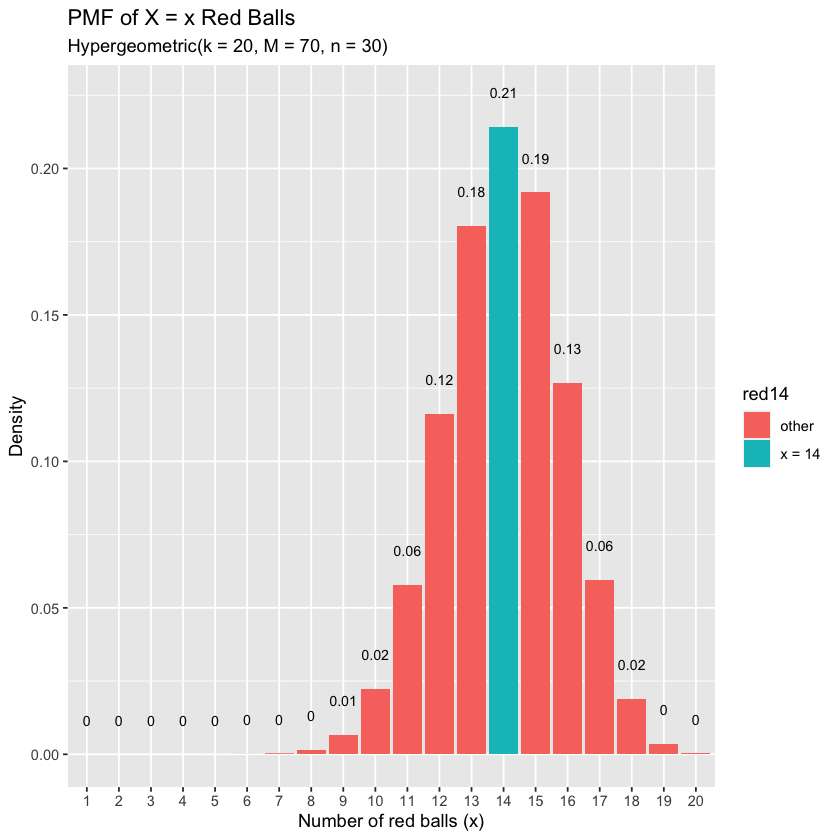

In [33]:
library(ggplot2)
library(dplyr)
options(scipen = 999, digits = 2) # significant digits

density = dhyper(x = 1:20, m = m, n = n, k = k)

data.frame(red = 1:20, density) %>%
  mutate(red14 = ifelse(red == 14, "x = 14", "other")) %>%
ggplot(aes(x = factor(red), y = density, fill = red14)) +
  geom_col() +
  geom_text(
    aes(label = round(density,2), y = density + 0.01),
    size = 3,
    vjust = 0
  ) +
  labs(title = "PMF of X = x Red Balls",
       subtitle = "Hypergeometric(k = 20, M = 70, n = 30)",
       x = "Number of red balls (x)",
       y = "Density")

## Example 6: Aces in a Five-Card Poker Hand

$$P\left(N_a=k\right)=\frac{\left(\begin{array}{c}4 \\ k\end{array}\right)\left(\begin{array}{c}48 \\ 5-k\end{array}\right)}{\left(\begin{array}{c}52 \\ 5\end{array}\right)}, k=0,1,2,3,4$$


In [34]:
x = seq(0,4) #possible number of aces
m = 4 # number of success elements in population=ace cards
n = 48  # number of failure elements in population= everything except ace cards
k = 5  # simple random sample size(five-card hand)

phyper(x, m, n, k) #Cummulative probabilities
dhyper(x, m, n, k)

[1] 0.66 0.96 1.00 1.00 1.00

[1] 0.658842 0.299474 0.039930 0.001736 0.000018

Those are the chances of all the different possible numbers of aces in a poker hand. They are rather hard to read, so let's try rounding them.

In [35]:
round(phyper(x, m, n, k), 3)

[1] 0.66 0.96 1.00 1.00 1.00

The histogram of the distribution can be drawn using Plot.

[1] 0 1 2 3 4

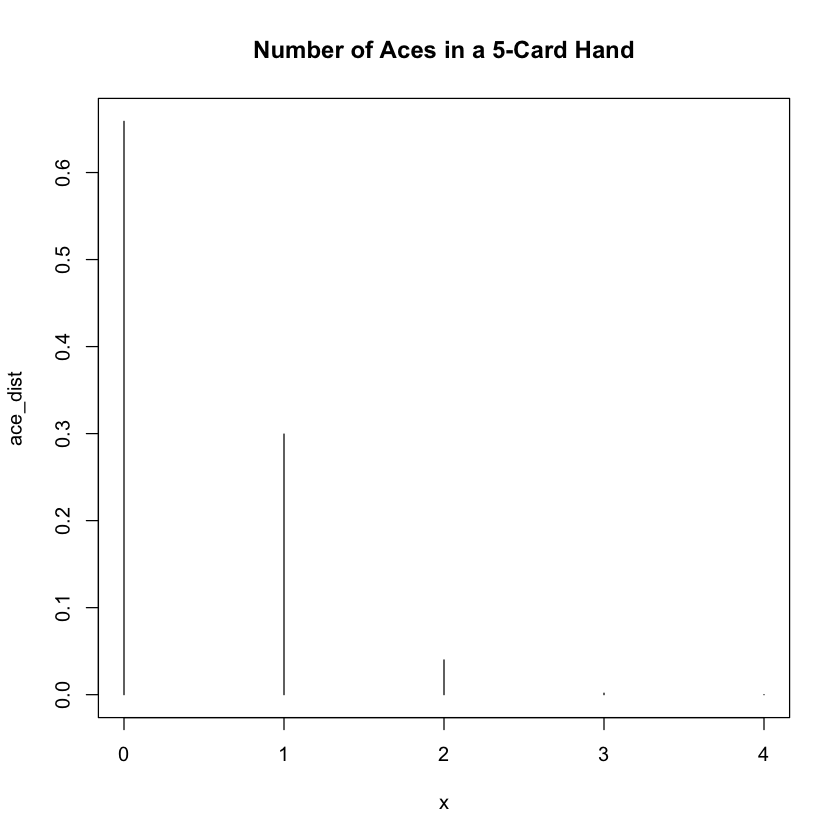

In [36]:
ace_probs = phyper(x, m, n, k)
ace_dist = dhyper(x, m, n, k)
plot(x,ace_dist, main ='Number of Aces in a 5-Card Hand',type='h')
x

## Example 7: Red Cards in a Bridge Hand

The essential features of all bridge games, as of whist, are that four persons play, two against two as partners; a standard 52-card deck of playing cards is dealt out one at a time, clockwise around the table, so that each player holds 13 cards; and the object of play is to win tricks, each trick consisting of one card played by each player. 

Here is the distribution of the number of red cards in a bridge hand of 13 cards:

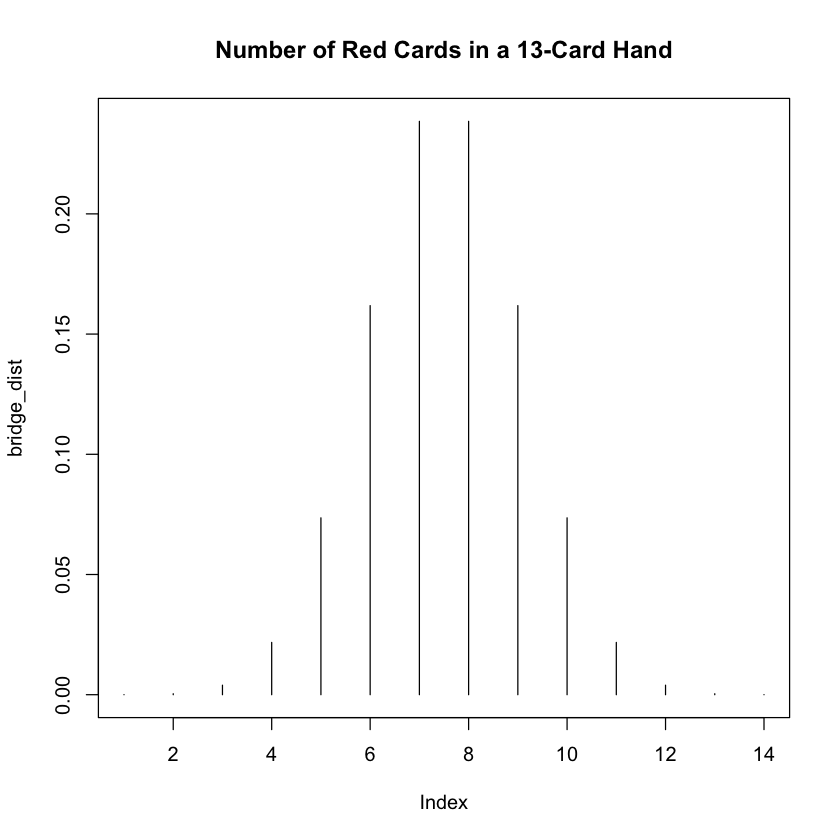

In [37]:
x = seq(0,13) #possible red cards
m = 26 #all red cards
n = 26 #all except red cards(failures)
k = 13 # number of draws

bridge_probs = phyper(x, m, n, k)
bridge_dist = dhyper(x, m, n, k)

plot(bridge_dist, main='Number of Red Cards in a 13-Card Hand',type ='h' )


This one looks rather binomial. And indeed, there is a close relation between the binomial and the hypergeometric distributions.

## Example 8: Successes in binomial distributions

Do a simulation with n = 20 (Bernoulli trials), p = .3 (success probability). If we know that there were 9 successes, what is the probability that fewer than 4 successes occurred during the first 8 trials?

Repeat with p = .6.

* 20 Bernoulli trials with fixed success probability
* Consider only cases with exactly 9 successes
* How many of these 9 successes occurred in the first 8 trials?
* Prob(3 or fewer successes in trials 1 .. 8  | 9 successes in trials 1 .. 20)


In [38]:
p = .3
x = rbinom(200000,1,p) # make many Bernoulli samples
X = matrix(x,ncol = 20) # arrange in groups of 20
head(X) #20 Bernoulli trials with fixed success probability

0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0,1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,0
0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0
0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


* Consider only cases with exactly 9 successes

In [39]:
s = rowSums(X) #total number of successes in each experiment

#subset of the matrix with only total of 9 successes
X.1 <- X[s == 9,] # look at cases where there were 8 in 20 successes
head(X.1)

0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0
0,0,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0
0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0
1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0


In [40]:
head(X.1[,1:8]) #How many of these 9 successes occurred in the first 8 trials?

mean(rowSums(X.1[,1:8]) < 4) # Prob( 3 or fewer successes in the first 8 trials)

0,1,1,1,0,1,1,0
0,0,0,0,1,1,0,1
0,1,0,0,0,1,0,1
0,1,0,1,0,1,1,0
1,1,1,1,0,0,0,0
1,1,1,1,0,0,0,0


[1] 0.46

Repeat with $p = .6$ and several other $p$ values. Does this depend on $p$?

In [41]:
p = .6
x = rbinom(200000,1,p) # make many Bernoulli samples
X = matrix(x,ncol = 20) # arrange in groups of 20
s = rowSums(X)

X.1 <- X[s == 9,] # look at cases where there were 8 in 20 successes
head(X.1)

mean(rowSums(X.1[,1:8]) < 4) # Prob( 3 or fewer successes in the first 8 trials)

1,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,0,0
1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
0,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,1
1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0
1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0
1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1


[1] 0.46

Now, Compute the exact value, using the hypergeometric distribution.

9 successes, 11 failures. Look at the first eight trials, find the probability of < 4 successes.  
$P(X<4)?$
$m=9, N-m=11, n=8(First 8 trials)$

In [42]:
phyper(3.5,9,11,8)

[1] 0.46

# Conditional Distributions

## Example 9: Binomial computations

For $X \sim B(50, .6)$ find 

a. $P(X < 18)$ 
b. $P(X < 18 | X > 12)$ 
c. $P(X > 12| X < 20)$ 

with an exact computation and by simulation.

In [43]:
n = 50
p = .25

#a. This can be found using the cdf but without the equal case
pbinom(17.5,n,p)

#b. 
(pbinom(17.5,n,p) - pbinom(12.5,n,p))/(1-pbinom(12.5,n,p))

#c.

(pbinom(19.5,n,p) - pbinom(12.5,n,p))/pbinom(19.5,n,p)

[1] 0.94

[1] 0.89

[1] 0.48

d. Find these probabilities with a simulation (approximately).

In [44]:
x <- rbinom(100000,n,p)
x1 <- x[x>12]
x2 <- x[x<20]
mean(x < 18)
mean(x1 < 18)
mean(x2 > 12)

[1] 0.94

[1] 0.89

[1] 0.48

# Example 10: Poisson distribution

Which of the following statments are true? __________

The following is a graph of the pmf of a Poisson distributed random variable $X$. 

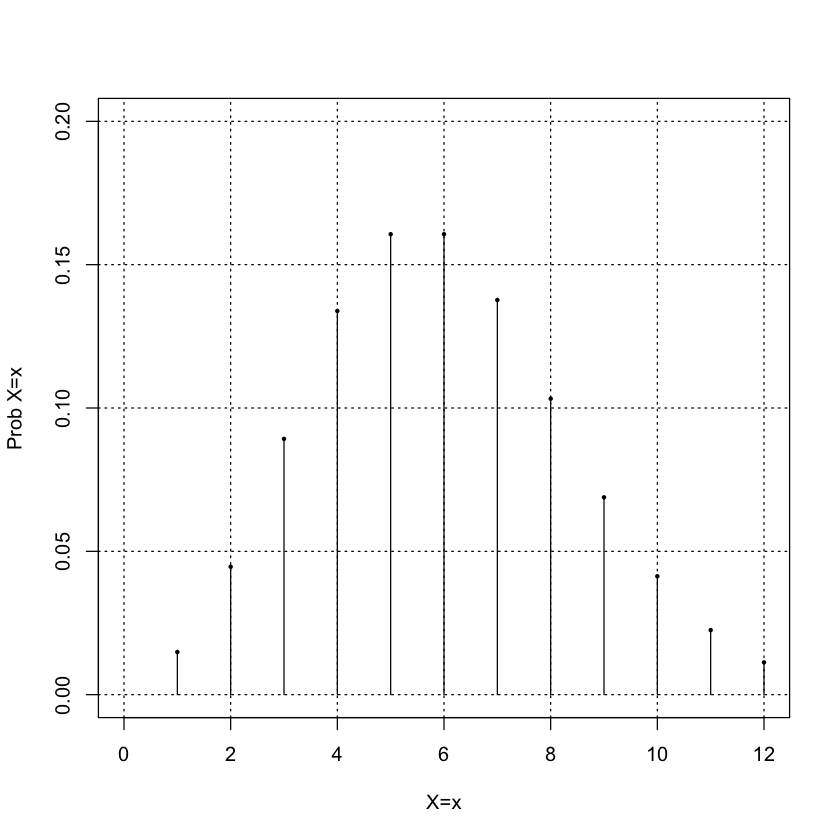

In [45]:
x <- seq(0:12)
y <- dpois(x,lambda=6)
plot(x,y, 
     ylab='Prob X=x', xlab='X=x',
     pch=16, 
     cex=0.5,
     ylim = c(0,.2), xlim = c(0,12)
     )
segments(x, 0, x, y)
grid(col = 1)